In [44]:
import datetime as dt
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
from scipy.stats import skew
from scipy.stats import kurtosis
import seaborn as sns
import numpy as np

In [66]:
energy_df = pd.read_csv('energy_data.csv')
fin_df = pd.read_csv('fin_data.csv')
mater_df = pd.read_csv('mater_data.csv')
cons_stap_df = pd.read_csv('cons_stap_data.csv')
indust_df = pd.read_csv('indust_data.csv')
comms_df = pd.read_csv('comms_data.csv')
real_df = pd.read_csv('real_data.csv')
tech_df = pd.read_csv('tech_data.csv')
util_df = pd.read_csv('util_data.csv')
cons_disc_df = pd.read_csv('cons_disc_data.csv')
health_df = pd.read_csv('health_data.csv')

energy_df['sector'] = 'ENERGY'
fin_df['sector'] = 'FIN'
mater_df['sector'] = 'MATER'
cons_stap_df['sector'] = 'CONS STAP'
indust_df['sector'] = 'INDUST'
comms_df['sector'] = 'COMMS'
real_df['sector'] = 'REAL'
tech_df['sector'] = 'TECH'
util_df['sector'] = 'UTIL'
cons_disc_df['sector'] = 'CONS DISC'
health_df['sector'] = 'HEALTH'

stocks_df = pd.concat([energy_df, fin_df, mater_df, cons_stap_df, indust_df, comms_df, real_df, tech_df, util_df, cons_disc_df, health_df], sort=False)

#Add 'returns' column
stocks_df['returns'] = stocks_df['close'].pct_change()
stocks_df['returns'] = stocks_df['returns'] * 100
stocks_df.volume = stocks_df.volume.astype(float)

#Set index
stocks_df.set_index(['date'], inplace=True)


#Print DataFrame
stocks_df

,symbol,close,high,low,open,volume,divCash,returns,sector
date,,,,,,,,,
2013-04-29,SLB,64.298744,64.515881,63.352024,63.890525,5212200.0,0.0000,NaN,ENERGY
2013-04-30,SLB,64.646164,64.811188,63.699444,64.420341,7392800.0,0.0000,0.540321,ENERGY
2013-05-01,SLB,64.090292,64.429026,63.699444,64.211889,6586500.0,0.0000,-0.859868,ENERGY
2013-05-02,SLB,64.489825,64.776446,63.803670,64.116348,4641400.0,0.0000,0.623391,ENERGY
2013-05-03,SLB,65.766593,66.357207,65.149922,65.175979,6582600.0,0.0000,1.979798,ENERGY
2013-05-06,SLB,66.148755,66.374578,65.558141,65.766593,4501800.0,0.0000,0.581088,ENERGY
2013-05-07,SLB,66.782796,67.269184,66.365892,66.522231,5866100.0,0.0000,0.958508,ENERGY
2013-05-08,SLB,67.390781,67.477636,66.470118,66.765425,4793800.0,0.0000,0.910391,ENERGY
2013-05-09,SLB,67.095474,67.451580,66.652514,67.295241,4382700.0,0.0000,-0.438201,ENERGY


1. Can you count something interesting? 
The follwoing code find the mean of the close column for WY and then counts the days the asset price closed above the mean close

In [68]:
wy = stocks_df.loc[stocks_df['symbol'] == 'WY']
wy.loc['2013-04-29', 'returns'] = np.nan
wy

C:\Users\dylan\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,symbol,close,high,low,open,volume,divCash,returns,sector
date,,,,,,,,,
2013-04-29,WY,24.654393,24.946065,24.480200,24.873147,3557400.0,0.00,NaN,REAL
2013-04-30,WY,24.719209,24.743515,24.403231,24.573373,4011600.0,0.00,0.262898,REAL
2013-05-01,WY,24.419435,24.824535,24.354619,24.597679,4239500.0,0.00,-1.212717,REAL
2013-05-02,WY,24.508557,24.686801,24.362721,24.484251,3223900.0,0.00,0.364964,REAL
2013-05-03,WY,24.832637,25.051391,24.630087,24.743515,3280300.0,0.00,1.322314,REAL
2013-05-06,WY,25.148615,25.189126,24.727311,24.832637,2583600.0,0.00,1.272431,REAL
2013-05-07,WY,25.424084,25.521308,25.087850,25.270146,2655400.0,0.00,1.095361,REAL
2013-05-08,WY,25.545614,25.602690,25.129774,25.243926,3056000.0,0.20,0.478011,REAL
2013-05-09,WY,25.936992,26.356909,25.602690,25.676073,6350400.0,0.00,1.532078,REAL


In [50]:
wy_close_mean = wy.close.mean()

In [51]:
wy_close_mean

28.505149509917885

In [52]:
wy.loc[wy['close'] > wy_close_mean].count()

date       655
symbol     655
close      655
high       655
low        655
open       655
volume     655
divCash    655
returns    655
sector     655
dtype: int64

2. Can you make a bar plot or a histogram?
Here I will create two histograms to compare the returns of one real estate stock vs one tech stock


C:\Users\dylan\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F095380470>]],
      dtype=object)

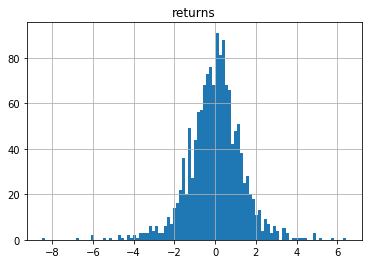

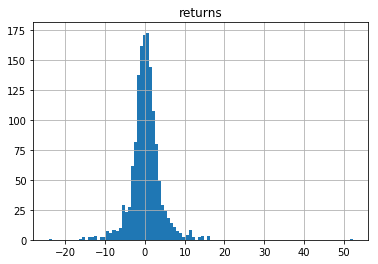

In [69]:
amd = stocks_df.loc[stocks_df['symbol'] == 'AMD']
amd.loc['2013-04-29', 'returns'] = np.nan

wy.hist('returns', bins=100)
amd.hist('returns', bins=100)


3. Having made these plots, what are some insights you get from them? Do you see any correlations? Is there a hypothesis you would like to investigate further? What other questions do they lead you to ask? After looking at these plots, I can see that, based off the histogram, the AMD stock retruns were less risky than the WY returns. I would like to find the average returns of each of their sectors to do similar comparison and see if Real Estate stocks are more to less risky than Technology stocks. I can also compare all sectors and start to develop a risk profile. 